## Linear Discriminant Analysis (LDA) Implementation

LDA is another algorithm (like PCA) for dimensionality reduction. The goal here is to project a dataset onto a lower-dimensional space with good class separability. LDA is supervised learning algorithm but PCA is unsupervised.

In [3]:
import numpy as np

class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]  
        class_labels = np.unique(y)

        # S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


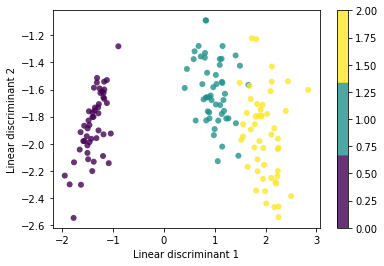

In [4]:
# Testing the LDA Alogithm Class implementation below with an example
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary linear discriminants 
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
            c=y, edgecolor='none',
            alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.colorbar()
plt.show()